In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

1nd

다른 버전, 위에 구한 linear을 구하라는 문제는 아닌 것 같다.
구하라고 하는 것은, 분명 솔루션을 추정하는데에 그 차이가 존재한다는 것을 보여주려는 것 같은데, 그러면 솔루션을 추정하는 함수를 작성해야 한다.

Text(0, 0.5, '$\\omega$')

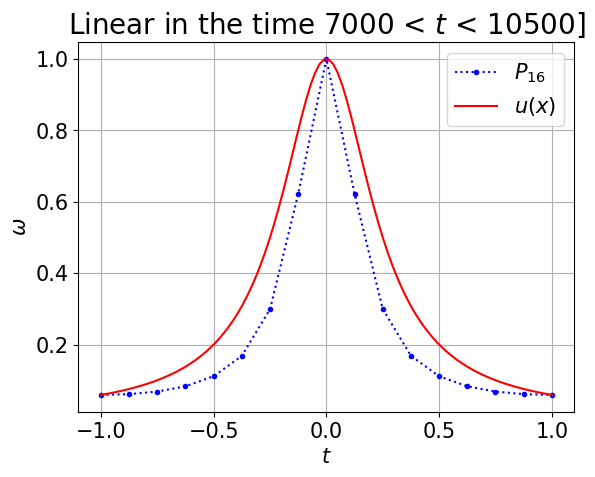

In [5]:
xi = [-1 + (x/8) for x in range(0, 17)]
yi = [1 / (1 + (16 * x**2)) for x in xj]

x_exact = np.linspace(-1, 1, 100)
y_exact = [1 / (1 + 16 * x ** 2) for x in x_exact]

plt.plot(xi, yi, ".:b", label='$P_{16}$')
plt.plot(x_exact, y_exact, "-r", label="$u(x)$")

plt.title('Linear in the time 7000 < $t$ < 10500]',fontsize = 20)
#plt.xlim([-1.1, 1.1])
#plt.ylim([0.30, 0.7])
plt.grid()
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$\omega$")



2nd

Text(0, 0.5, '$\\omega$')

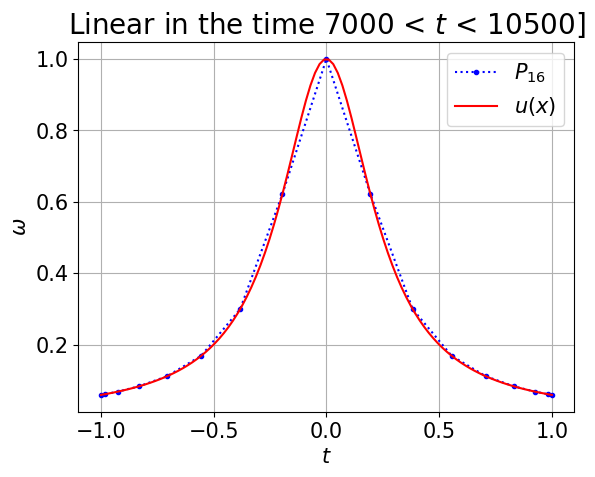

In [63]:
xi = [np.cos((x * np.pi) / 16) for x in range(0, 17)]
yi = [1 / (1 + (16 * x**2)) for x in xj]

x_exact = np.linspace(-1, 1, 100)
y_exact = [1 / (1 + 16 * x ** 2) for x in x_exact]

plt.plot(xi, yi, ".:b", label='$P_{16}$')
plt.plot(x_exact, y_exact, "-r", label="$u(x)$")

plt.title('Linear in the time 7000 < $t$ < 10500]',fontsize = 20)
#plt.xlim([-1.1, 1.1])
#plt.ylim([0.30, 0.7])
plt.grid()
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$\omega$")



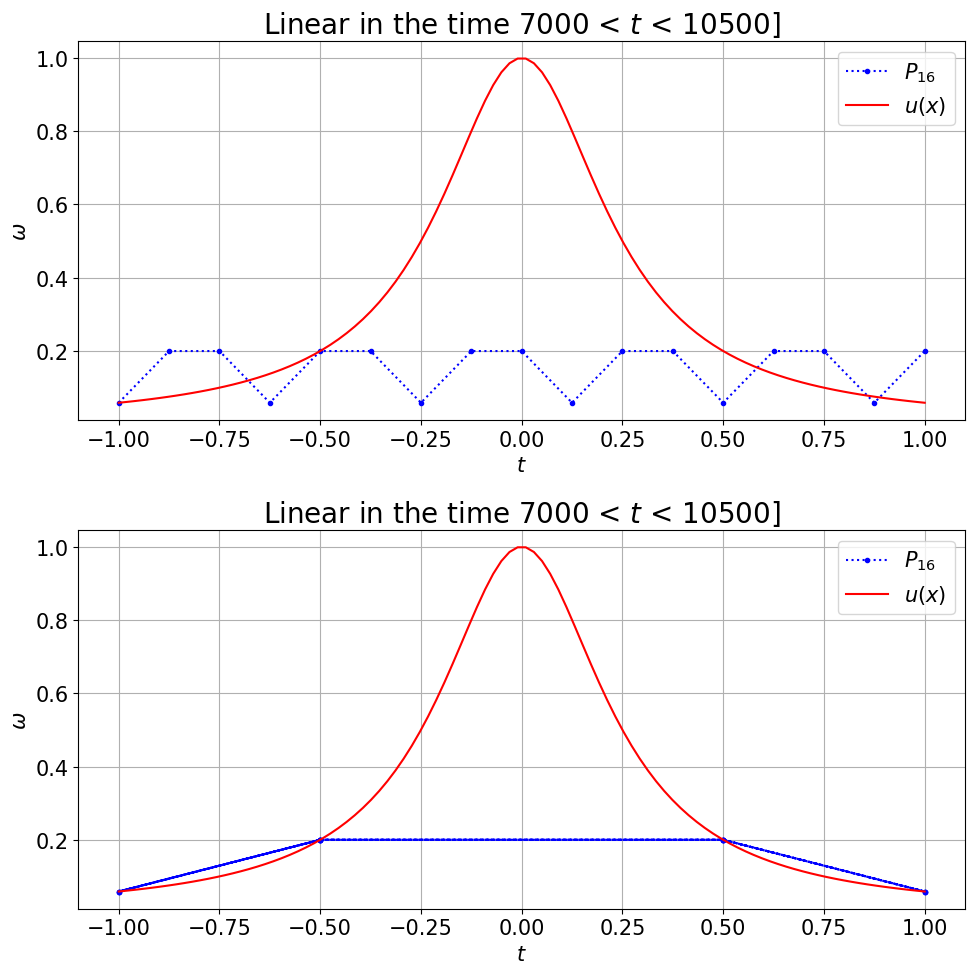

In [32]:
#N
N = 3

plt.figure(figsize = (10,10))
#1
xi = [-1 + (x/8) for x in range(0, 17)]
yi = [1 / (1 + (16 * x**2)) for x in xj]

x_exact = np.linspace(-1, 1, 100)
y_exact = [1 / (1 + 16 * x ** 2) for x in x_exact]

plt.subplot(2, 1, 1)
plt.plot(xi, yi, ".:b", label='$P_{16}$')
plt.plot(x_exact, y_exact, "-r", label="$u(x)$")

plt.title('Linear in the time 7000 < $t$ < 10500]',fontsize = 20)
#plt.xlim([-1.1, 1.1])
#plt.ylim([0.30, 0.7])
plt.grid()
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$\omega$")



#2
xj = [np.cos((x * np.pi) / N) for x in range(0, 17)]
yj = [1 / (1 + (16 * x**2)) for x in xj]

plt.subplot(2, 1, 2)
plt.plot(xj, yj, ".:b", label='$P_{16}$')
plt.plot(x_exact, y_exact, "-r", label="$u(x)$")

plt.title('Linear in the time 7000 < $t$ < 10500]',fontsize = 20)
#plt.xlim([-1.1, 1.1])
#plt.ylim([0.30, 0.7])
plt.grid()
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$\omega$")



plt.tight_layout()

여기서 구한 점을 통해서, 점을 다시 곡선으로 만들어 보자. 우리가 점만 알았다고 치고

In [58]:
def poly_fit(xs, ys):
    """Fit a polynominal of degree n that fits the all data points given.
    
    It returns coefficients, a_n, a_n-1, a_n-2, ..., a_1, a_0, in the polynomial
    
        p(x) = a_n*x^n + a_n-1*x^n-1 + a_n-2*x^n-2 + ... + a_1*x + a_0
    """
    assert len(xs) == len(ys)
    
    i = np.flip(range(len(xs))) # integer exponents are sorted in descending order
                                # so that the first element is the coefficent
                                # of the highest order term
    b = ys
    A = [x ** i for x in xs]
    
    return la.solve(A, b)

def poly_val(aj, x):
    """Evaluate the polynomial
    
        p(x) = a_n*x^n + a_n-1*x^n-1 + a_n-2*x^n-2 + ... + a_1*x + a_0
        
    at x given the coefficients, a_n, a_n-1, a_n-2, ..., a_1, a_0.
    """
    assert len(aj) > 1
    
    y = aj[0]
    for a in aj[1:]:
        y = y*x + a
    
    return y

In [ ]:
from scipy.special import eval_legendre

N = 16



# 1-degree polynomial (i.e., line) fitting
coefs = poly_fit(xj, yj)

# define the grid points to display the fit polynomial
x = np.linspace(-1, 1, 100)
p = poly_val(coefs, x)

x_exact = np.linspace(-1, 1, 100)
y_exact = [1 / (1 + 16 * x ** 2) for x in x_exact]

plt.figure(figsize = (12,8))
plt.plot(x_exact, y_exact, "-r", label="$u(x)$")
plt.plot(x, p, ".b", lw=1)
plt.grid()
plt.show()

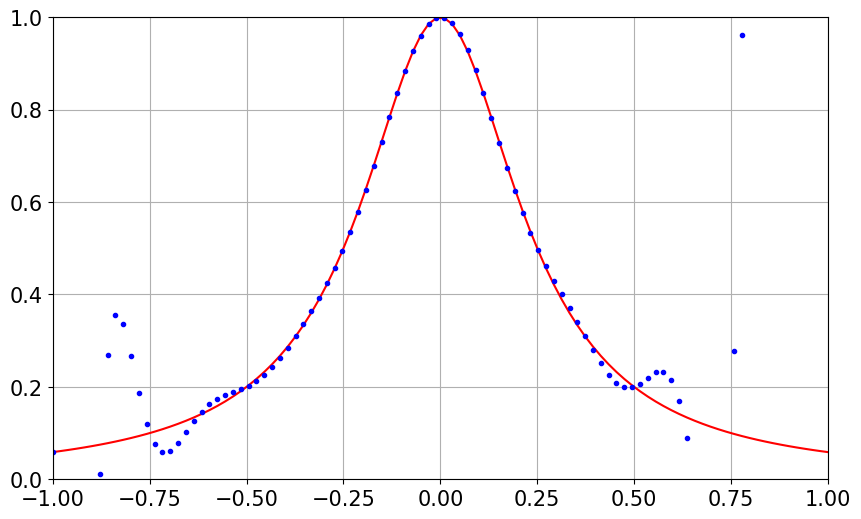

In [128]:
from scipy.special import eval_legendre

N = 16

xi = [-1 + (x/8) for x in range(0, N)]
yi = [1 / (1 + (16 * x**2)) for x in xi]

# 1-degree polynomial (i.e., line) fitting
coefs = poly_fit(xi, yi)

# define the grid points to display the fit polynomial
x = np.linspace(-1, 1, 100)
p = poly_val(coefs, x)

x_exact = np.linspace(-1, 1, 100)
y_exact = [1 / (1 + 16 * x ** 2) for x in x_exact]

plt.figure(figsize = (10,6))
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.plot(x_exact, y_exact, "-r", label="$u(x)$")
plt.plot(x, p, ".b", lw=1)
plt.grid()
plt.show()

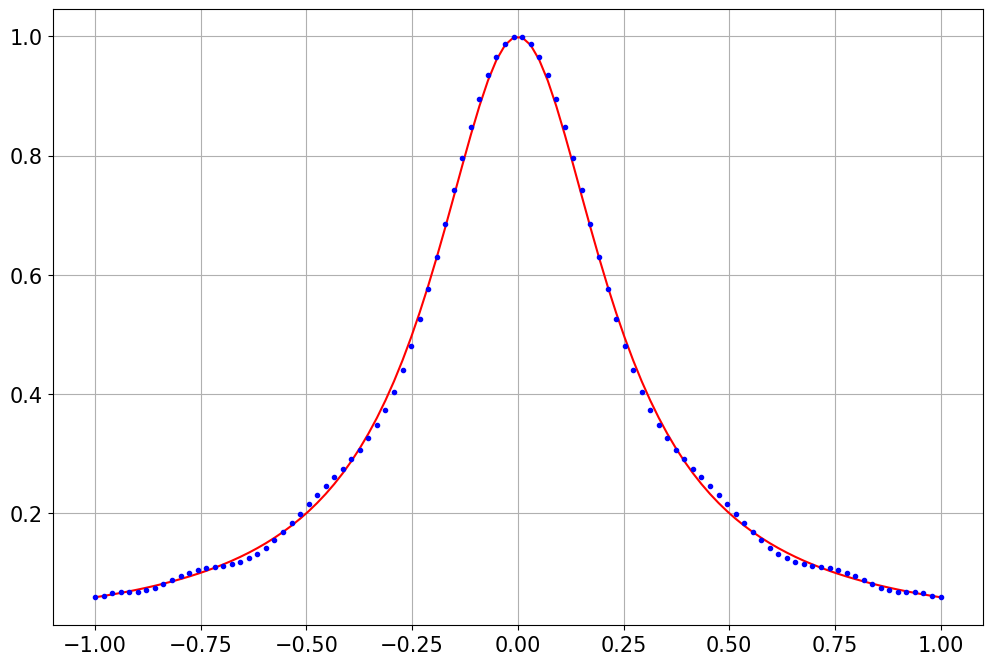

In [57]:
from scipy.special import eval_legendre

N = 16

xj = [np.cos((x * np.pi) / N) for x in range(0, 17)]
yj = [1 / (1 + (16 * x**2)) for x in xj]

# 1-degree polynomial (i.e., line) fitting
coefs = poly_fit(xj, yj)

# define the grid points to display the fit polynomial
x = np.linspace(-1, 1, 100)
p = poly_val(coefs, x)

x_exact = np.linspace(-1, 1, 100)
y_exact = [1 / (1 + 16 * x ** 2) for x in x_exact]

plt.figure(figsize = (12,8))
plt.plot(x_exact, y_exact, "-r", label="$u(x)$")
plt.plot(x, p, ".b", lw=1)
plt.grid()
plt.show()